# Vehicle Recognizer
The goal of this project is to classify 33 different types of vehicles that are used commonly around the world. The types are following: <br/>


1.   ATV
2.   Airplane
3.   Ambulance
4.   Armored Tank
5.   Autorickshaw
6.   Bicycle
7.   Boat
8.   Buggy
9.   Bulldozer
10.  Cargo Ship
11.  Cargo Truck
12.  Crane
13.  Excavator
14.  Ferry
15.  Helicopter
16.  Hot Air Baloon
17.  Microbus
18.  Monster Truck
19.  Motorcycle
20.  Multi Purpose Vehicle
21.  Ocean Liner
22.  Police Car
23.  Private Car
24.  Rickshaw
25.  SUV
26.  Sail Boat
27.  Semi Truck
28.  Sports Car
29.  Steam Roller
30.  Train
31.  Transport Bus
32.  Truck
33.  Yacht


# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 3

In [2]:
!pip install -Uqq fastai

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/My Drive/MasterCourse/VehicleRecognizer

/content/drive/My Drive/MasterCourse/VehicleRecognizer


In [ ]:
!unzip '/content/drive/My Drive/MasterCourse/VehicleRecognizer/data.zip' -d '/content/drive/My Drive/MasterCourse/VehicleRecognizer/data/'

In [13]:
data_path = "data"

# Check if any image is corrupted before starting training the model

In [ ]:
image_counts = get_image_files(data_path)
image_counts

In [ ]:
failed = verify_images(image_counts)
failed

In [ ]:
failed.map(Path.unlink)

# Fetch Data

In [8]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
#For creating new datablock and make a dataloader
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/vehicle_dataloader_v{version}.pkl")

In [14]:
# load a previous dataloader
dls = torch.load(f"dataloaders/vehicle_dataloader_v{version}.pkl")

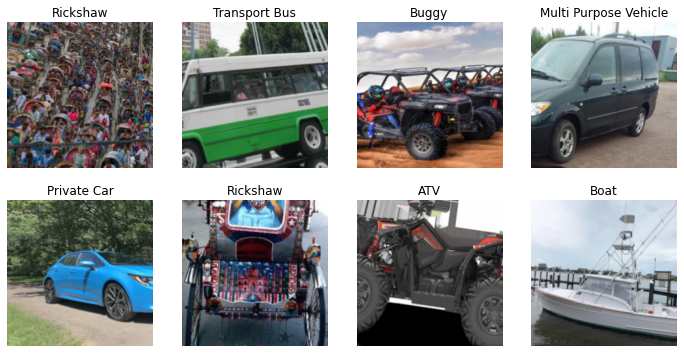

In [8]:
dls.train.show_batch(max_n=8, nrows=2)

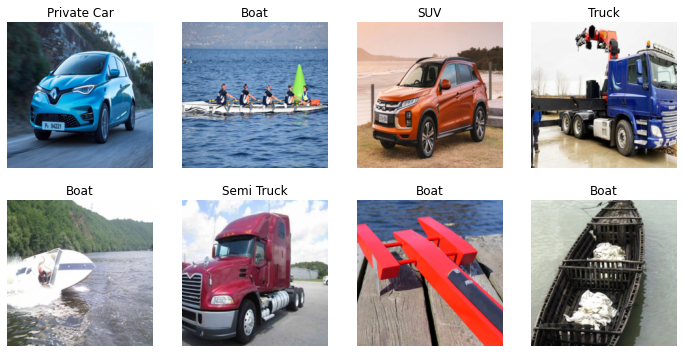

In [9]:
dls.valid.show_batch(max_n=8, nrows=2)

# Training and Data Cleaning

In [6]:
model_path = "models"

In [15]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [16]:
model.load(f"vehicle_recognizer_v{version}")

In [12]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.074710,0.528273,0.154292,0.845708,1:00:45


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.714371,0.464336,0.131090,0.868910,05:46
1,0.634356,0.443350,0.139211,0.860789,05:42


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converte

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.714371,0.464336,0.131090,0.868910,05:46
1,0.634356,0.443350,0.139211,0.860789,05:42
2,0.443709,0.389322,0.121810,0.878190,05:43
3,0.289095,0.361554,0.100928,0.899072,05:39
4,0.182327,0.336671,0.091647,0.908353,05:39


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to 

In [ ]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.510430,0.412836,0.122807,0.877193,02:42


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.656758,0.514978,0.155388,0.844612,02:40


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
model.save(f"vehicle_recognizer_v{version}")

Path('models/vehicle_recognizer_v2.pth')

In [5]:
model.load(f"cap-recognizer-v{2}")

NameError: ignored

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


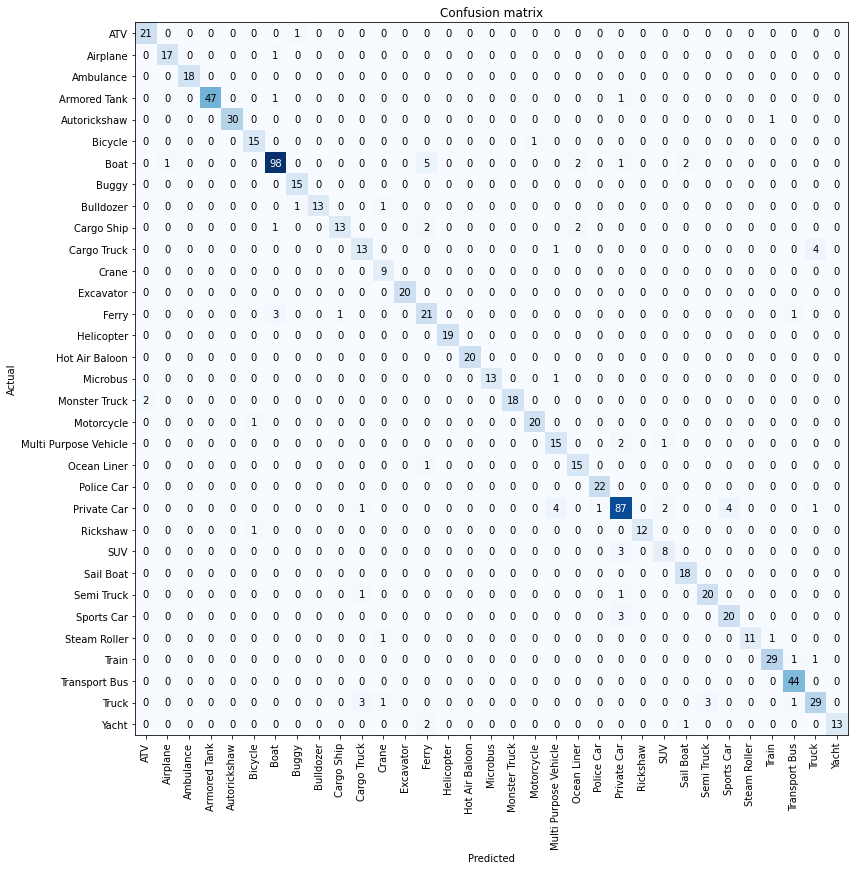

In [14]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(12, 12))

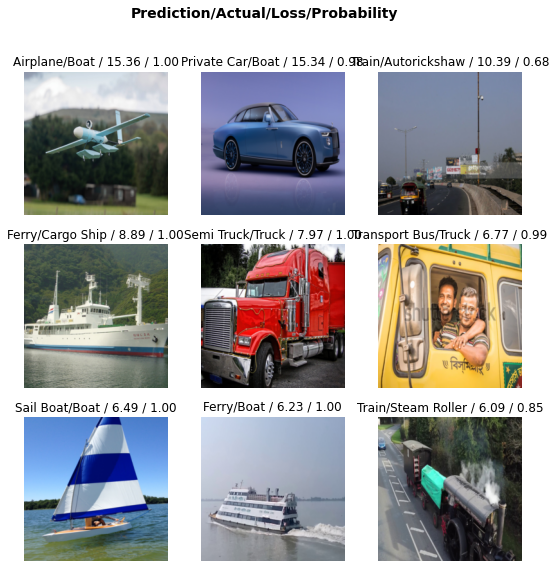

In [17]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

# Export model for inference

In [15]:
model.export(f"{model_path}/vehicle-recognizer-v{version}.pkl")

In [16]:
dls.train.vocab

['ATV', 'Airplane', 'Ambulance', 'Armored Tank', 'Autorickshaw', 'Bicycle', 'Boat', 'Buggy', 'Bulldozer', 'Cargo Ship', 'Cargo Truck', 'Crane', 'Excavator', 'Ferry', 'Helicopter', 'Hot Air Baloon', 'Microbus', 'Monster Truck', 'Motorcycle', 'Multi Purpose Vehicle', 'Ocean Liner', 'Police Car', 'Private Car', 'Rickshaw', 'SUV', 'Sail Boat', 'Semi Truck', 'Sports Car', 'Steam Roller', 'Train', 'Transport Bus', 'Truck', 'Yacht']